## A spiking discontinuity mechanism for deep learning

Imports

In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from lib.lif import LIF_Recurrent, ParamsLIF_Recurrent

Populating the interactive namespace from numpy and matplotlib


## Setup

In [2]:
tau_s = 0.020
dt = 0.001
t = 1
DeltaT = 20
t_filter = np.linspace(0, 1, 2000)
exp_filter = np.exp(-t_filter/tau_s)
exp_filter = exp_filter/np.sum(exp_filter)
ds = exp_filter[0]
params = ParamsLIF_Recurrent(exp_filter, dt = dt)
lif = LIF_Recurrent(params, t = t)

## Eval with initial weights

In [3]:
loss, acc, results = lif.eval()
(inp, v, h, u, sh, y) = results

In [4]:
sh.shape

(32, 110, 1000)

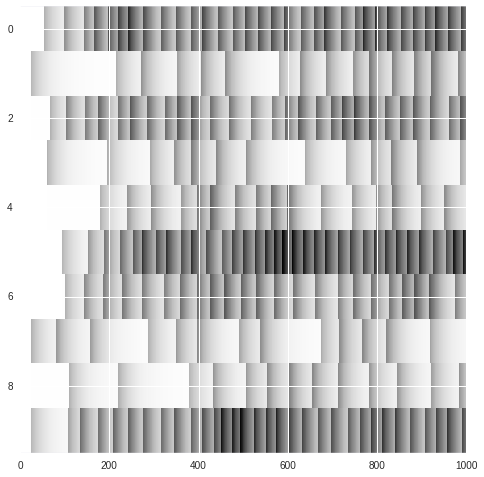

In [5]:
#Plot the results...
fig, axes = plt.subplots(1, 1, figsize = (8,8))
axes.imshow(sh[2,100:110,:], aspect = 'auto', interpolation = 'none')

## Eval with final weights

In [6]:
fn_in = './results/spiking_bp_N_1000_batchsize_32.pkl'
lif.restore(fn_in)
loss, acc, results = lif.eval()
(inp, v, h, u, sh, y) = results

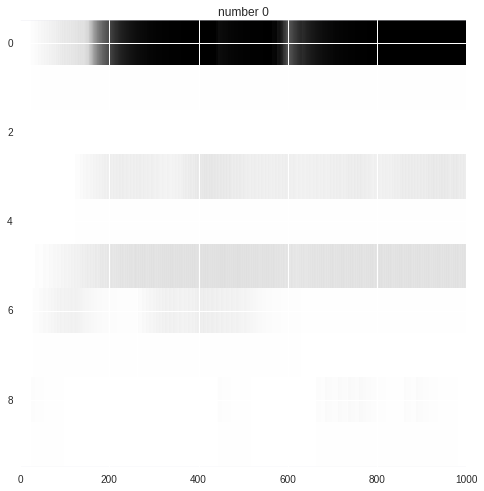

In [7]:
fig, axes = plt.subplots(1, 1, figsize = (8,8))
idx = 6
axes.set_title('number %d'%y[idx])
axes.imshow(sh[idx,100:110,:], aspect = 'auto', interpolation = 'none')

## Eval with final weights -- feedback alignment

In [8]:
fn_in = './results/spiking_fa_N_1000_batchsize_32.pkl'
lif.restore(fn_in)
loss, acc, results = lif.eval()
(inp, v, h, u, sh, y) = results

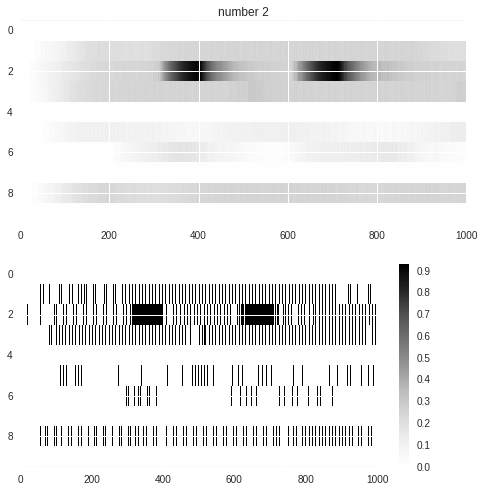

In [9]:
fig, axes = plt.subplots(2, 1, figsize = (8,8))
idx = 6
axes[0].set_title('number %d'%y[idx])
a = axes[0].imshow(sh[idx,100:110,:], aspect = 'auto', interpolation = 'none')
axes[1].imshow(h[idx,100:110,:], aspect = 'auto', interpolation = 'none')
plt.colorbar(a)